1. import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. load dataset

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

3. explore basic info

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


4. handle missing values

In [6]:
df.fillna({"Age":df["Age"].mean()}, inplace = True)

In [7]:
df.fillna({"Embarked":df["Embarked"].mode()}, inplace = True)

In [8]:
# drop "Cabin" because too many nulls
df = df.drop("Cabin", axis = 1)

In [11]:
# drop "PassengerId", "Name", "Ticket" because they do not contribute in the predictions
df = df.drop(["PassengerId", "Name", "Ticket"], axis = 1)

5. encoding categorical features

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
df["Sex"] = le.fit_transform(df["Sex"])

In [15]:
df["Sex"]

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [17]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


6. normalize numerical features

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])

7. visualize outliers using boxplots

Text(0.5, 1.0, 'Boxplot for Age and Fare')

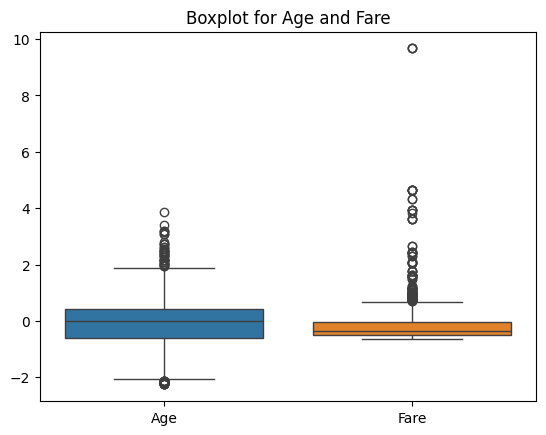

In [21]:
sns.boxplot(data = df[['Age', 'Fare']])
plt.title('Boxplot for Age and Fare')

8. remove outliers using IQR method

In [22]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

In [23]:
clean_df = df.copy()

In [24]:
clean_df = remove_outliers(clean_df, "Age")

In [25]:
clean_df = remove_outliers(clean_df, "Fare")

In [26]:
# original shape
df.shape

(891, 8)

In [27]:
# shape after removing outliers
clean_df.shape

(718, 8)

Text(0.5, 1.0, 'After Removing Outliers')

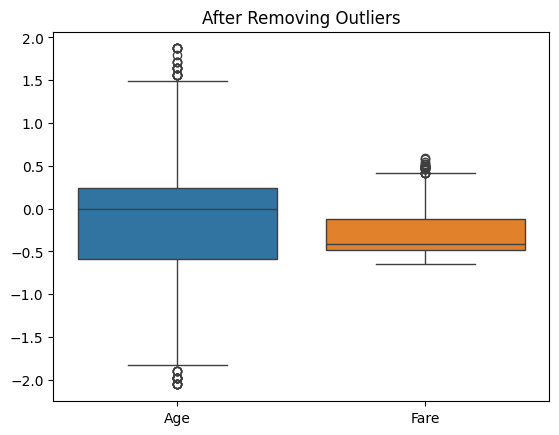

In [28]:
sns.boxplot(data = clean_df[["Age", "Fare"]])
plt.title("After Removing Outliers")